# Over-Fitting and Model Tunning

**Over-fitting:** Overemphasizing patterns that are not easily reproducible

**Tuning parameter:** a parameter with no analytical formula to calculate an appropriate value

### Load `AppliedPredictiveModeling` package

In [1]:
library(AppliedPredictiveModeling)
data(twoClassData)

The predictors are stored in a frame called predictors

In [2]:
str(predictors)

'data.frame':	208 obs. of  2 variables:
 $ PredictorA: num  0.158 0.655 0.706 0.199 0.395 ...
 $ PredictorB: num  0.1609 0.4918 0.6333 0.0881 0.4152 ...


Classes are in a vector called classes

In [4]:
str(classes)

 Factor w/ 2 levels "Class1","Class2": 2 2 2 2 2 2 2 2 2 2 ...


The R function `sample` can create simple random splits of the data. To create stratified splits, the createDataPartition function  in the `caret` package can be used. Percentage of data for training must be specified

In [20]:
# Set the random number seed so we can reproduce the results
set.seed(1)
# By default, the numbers are returned as a list. 
# Using list = FALSE, a matrix of row numbers is generated.
# These samples are allocated to the training set.
library(caret)
trainingRows <- createDataPartition(classes,
                                   p=.80,
                                   list= FALSE)

In [21]:
head(trainingRows)

Resample1
1
2
3
4
5
6


In [23]:
# Subset the data into object for training using 
# integer sub-setting
trainPredictors <- predictors[trainingRows, ]
trainClasses <- classes[trainingRows]

# Do the same for the test set using negative integers
testPredictors <- predictors[-trainingRows, ]
testClasses <- classes[-trainingRows]

In [24]:
str(trainPredictors)

'data.frame':	167 obs. of  2 variables:
 $ PredictorA: num  0.158 0.655 0.706 0.199 0.395 ...
 $ PredictorB: num  0.1609 0.4918 0.6333 0.0881 0.4152 ...


In [25]:
str(testPredictors)

'data.frame':	41 obs. of  2 variables:
 $ PredictorA: num  0.0658 0.1056 0.2909 0.4129 0.0472 ...
 $ PredictorB: num  0.1786 0.0801 0.3021 0.2869 0.0414 ...


Use `maxdissmim` function in the caret lib to generate test sets using maximum dissimilarity sampling

### Resampling

To use repeated training/test splits, the function `createDataPartitions` from the `caret` library can be used with an additional argument `times` to generate multiple splits

In [27]:
set.seed(1)
# Resampled versions of the training set
repeatedSplits <- createDataPartition(trainClasses, p = .80, times = 3)

In [28]:
str(repeatedSplits)

List of 3
 $ Resample1: int [1:135] 1 2 4 5 6 8 9 10 11 12 ...
 $ Resample2: int [1:135] 2 3 4 6 7 8 9 11 14 15 ...
 $ Resample3: int [1:135] 4 5 6 7 8 9 11 13 14 15 ...


Similarly, `caret` package has functions `createResamples`, `createFolds` (for k-fold cross-validation) and `createMultiFolds` (for repeated cross-validation)

In [30]:
set.seed(1)
cvSplits <- createFolds(trainClasses, k = 10, returnTrain = TRUE)
str(cvSplits)

List of 10
 $ Fold01: int [1:151] 2 3 4 5 6 7 11 12 13 14 ...
 $ Fold02: int [1:150] 1 2 3 4 5 6 7 8 9 10 ...
 $ Fold03: int [1:150] 1 2 3 4 5 6 7 8 9 10 ...
 $ Fold04: int [1:151] 1 2 3 4 5 7 8 9 10 11 ...
 $ Fold05: int [1:150] 1 2 3 5 6 7 8 9 10 11 ...
 $ Fold06: int [1:150] 1 2 3 4 5 6 8 9 10 11 ...
 $ Fold07: int [1:150] 1 3 4 5 6 7 8 9 10 11 ...
 $ Fold08: int [1:151] 1 2 3 4 5 6 7 8 9 10 ...
 $ Fold09: int [1:150] 1 2 4 5 6 7 8 9 10 12 ...
 $ Fold10: int [1:150] 1 2 3 4 6 7 8 9 10 11 ...


In [31]:
# Get the first set of rows from the list
fold1 <-cvSplits[[1]]

To get the first 90% of the data in the first fold

In [33]:
cvPredictors1 <- trainPredictors[fold1,]
cvClasses <- trainClasses[fold1]
nrow(trainPredictors)
nrow(cvPredictors1)

[1] 167

[1] 151

### Basic Model Building

1. `knn` is in the MASS package
2. `ipredknn` in the ipred package
3. `knn3` in the caret package

`knn3` can produce class predictions as well as the proportion of neighbors for each class

#### **Conventions for specifying Models**
1. Formula interface
2. Non-Formula (matrix) interface

**Formula Interface**

In R, the left hand denotes the outcome of a function and on the right we have predictors. The outcome and predictor are separated by **`~`**

**`example`**

`modelFunction(price ~ numBedrooms + numBaths + acres, data = housingData)`

To use all columns in a data set except `y` we would use the formula `y ~ .`

The advantage of the formula interface is that it allows inline transformations like `log(acres)` but it is not a good option for datasets that contain a large number of predictors because it might make computations slower

**Non-Formula Interface**

The non-formula interface specifies the predictors for the model using a matrix or data frame. The outcome data are usually passed into the model as a vector object.

**`example`**

`modelFunction(x = housePredictors, y = price)`

All **`R`** functions have both interfaces

***Using `knn3` to estimate 5-nearest neighbors***

In [80]:
trainingPredictors_m <- as.matrix(trainPredictors)
knnFit <- knn3(x = trainingPredictors_m, y = trainClasses, k = 5)
knnFit

5-nearest neighbor classification model
Training set class distribution:

Class1 Class2 
    89     78 


To assign new samples to classes, the `predict` method is used with the model object.

In [81]:
testPredictions <- predict(knnFit, newdata = testPredictors, type = "class")
head(testPredictions)

[1] Class2 Class2 Class1 Class1 Class2 Class2
Levels: Class1 Class2

In [82]:
str(testPredictions)

 Factor w/ 2 levels "Class1","Class2": 2 2 1 1 2 2 2 2 2 2 ...


### Determination of Tuning Parameters

The `e1071` package contains the `tune` function which can evaluate four types of models across a range of parameters.

The `errorest` function in the `ipred` package can resample single models

The `train` function in `caret` package has built-in modules for 144 models. It also has the capability for parallel processing.

#### Using SVM model for credit rating

In [83]:
library(caret)
data(GermanCredit)

In [84]:
## First, remove near-zero variance predictors then get rid of a few predictors 
## that duplicate values. For example, there are two possible values for the 
## housing variable: "Rent", "Own" and "ForFree". So that we don't have linear
## dependencies, we get rid of one of the levels (e.g. "ForFree")

GermanCredit <- GermanCredit[, -nearZeroVar(GermanCredit)]
GermanCredit$CheckingAccountStatus.lt.0 <- NULL
GermanCredit$SavingsAccountBonds.lt.100 <- NULL
GermanCredit$EmploymentDuration.lt.1 <- NULL
GermanCredit$EmploymentDuration.Unemployed <- NULL
GermanCredit$Personal.Male.Married.Widowed <- NULL
GermanCredit$Property.Unknown <- NULL
GermanCredit$Housing.ForFree <- NULL

## Split the data into training (80%) and test sets (20%)
set.seed(100)
inTrain <- createDataPartition(GermanCredit$Class, p = .8)[[1]]
GermanCreditTrain <- GermanCredit[ inTrain, ]
GermanCreditTest  <- GermanCredit[-inTrain, ]

## The model fitting code shown in the computing section is fairly
## simplistic.  For the text we estimate the tuning parameter grid
## up-front and pass it in explicitly. This generally is not needed,
## but was used here so that we could trim the cost values to a
## presentable range and to re-use later with different resampling
## methods.

library(kernlab)
set.seed(231)
sigDist <- sigest(Class ~ ., data = GermanCreditTrain, frac = 1)
svmTuneGrid <- data.frame(sigma = as.vector(sigDist)[1], C = 2^(-2:7))

### Optional: parallel processing can be used via the 'do' packages,
### such as doMC, doMPI etc. We used doMC (not on Windows) to speed
### up the computations.

### WARNING: Be aware of how much memory is needed to parallel
### process. It can very quickly overwhelm the available hardware. We
### estimate the memory usage (VSIZE = total memory size) to be 
### 2566M/core.

library(doMC)
registerDoMC(4)

In [90]:
set.seed(1056)
svmFit <- train(Class ~ .,
               data = GermanCreditTrain,
               # The "method" argument indicates the model type.
               # See ?train for a list of available models)
               method = "svmRadial",
               preProc = c("center","scale"),
               # tunelengh = 10 ecaluates cost values 2^-2,...,2^-7
               tuneLength = 10,
               tuneGrid = svmTuneGrid,
               # Use 10-fold cross-validation
               trControl = trainControl(method = "repeatedcv",
                                          repeats = 5,
                                          classProbs = TRUE))
svmFit

Support Vector Machines with Radial Basis Function Kernel 

800 samples
 41 predictors
  2 classes: 'Bad', 'Good' 

Pre-processing: centered (41), scaled (41) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 
Resampling results across tuning parameters:

  C       Accuracy  Kappa    
    0.25  0.74000   0.3515746
    0.50  0.74175   0.3496850
    1.00  0.74500   0.3468956
    2.00  0.74325   0.3283526
    4.00  0.74375   0.3264491
    8.00  0.74725   0.3202249
   16.00  0.74575   0.3081379
   32.00  0.74000   0.2866269
   64.00  0.74025   0.2777431
  128.00  0.73575   0.2710350

Tuning parameter 'sigma' was held constant at a value of 0.008865455
Accuracy was used to select the optimal model using  the largest value.
The final values used for the model were sigma = 0.008865455 and C = 8. 

`plot` is used to visualize the performance scale

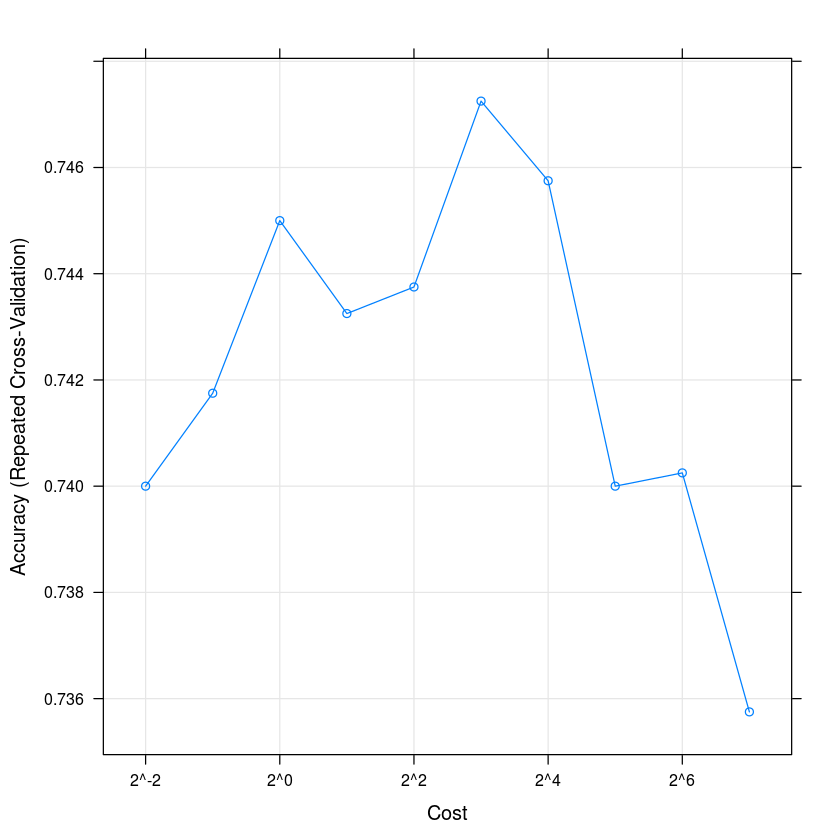

In [91]:
# A line plot of the average performance
plot(svmFit, scales = list(x = list(log = 2)))

Predimct new samples

In [92]:
predictedClasses <- predict(svmFit, GermanCreditTest)
str(predictedClasses) 

 Factor w/ 2 levels "Bad","Good": 1 2 2 2 1 2 2 2 1 2 ...


In [93]:
predictedProbs <- predict(svmFit, newdata = GermanCreditTest, type = "prob")
head(predictedProbs)

Bad,Good
0.5579638,0.4420362
0.4780411,0.5219589
0.3175943,0.6824057
0.1098867,0.8901133
0.5721274,0.4278726
0.1558800,0.8441200


### Between-Model Comparisons

Performing the above training using logistic linear regression

In [97]:
set.seed(1056)
logisticReg <- train(Class ~ .,
                    data = GermanCreditTrain,
                    method = "glm",
                    trControl = trainControl(method = "repeatedcv"
                                            ,repeats = 5))
logisticReg

Generalized Linear Model 

800 samples
 41 predictors
  2 classes: 'Bad', 'Good' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 
Resampling results:

  Accuracy  Kappa    
  0.749     0.3647664

 

Now we compare Logistic Regression (Generalized Linear Model), with SVM (Support Vector Machine)

In [98]:
resamp <- resamples(list(SVM = svmFit, Logistic = logisticReg))
summary(resamp)


Call:
summary.resamples(object = resamp)

Models: SVM, Logistic 
Number of resamples: 50 

Accuracy 
           Min. 1st Qu. Median   Mean 3rd Qu.  Max. NA's
SVM      0.6375   0.725 0.7562 0.7472  0.7844 0.825    0
Logistic 0.6125   0.725 0.7562 0.7490  0.7844 0.850    0

Kappa 
             Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
SVM      -0.02113  0.2369 0.3277 0.3202  0.4178 0.5139    0
Logistic  0.07534  0.2831 0.3750 0.3648  0.4504 0.6250    0


check `?xyplot.resamples` for a list of plot types

#### Check for possible differences

In [99]:
modelDifferences <- diff(resamp)
summary(modelDifferences)


Call:
summary.diff.resamples(object = modelDifferences)

p-value adjustment: bonferroni 
Upper diagonal: estimates of the difference
Lower diagonal: p-value for H0: difference = 0

Accuracy 
         SVM    Logistic
SVM             -0.00175
Logistic 0.7491         

Kappa 
         SVM      Logistic
SVM               -0.04454
Logistic 0.002217         
